<img src="https://raw.githubusercontent.com/MLMI2-CSSI/foundry/main/assets/foundry-black.png" width=450>

# Foundry Atom Position Finding Tutorial for Beginners

This introduction uses Foundry to:


1.   Load HDF5 data from Foundry
2.   Visualize data inputs and groundtruth
3.   Load a predictive model from Foundry
4.   infer the atomic column positions in the input STEM images. 

This notebook is set up to run as a [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=5fCEDCU_qrC0) notebook, which allows you to run python code in the browser, or as a [Jupyter](https://jupyter.org/) notebook, which runs locally on your machine.

The code in the next cell will detect your environment to make sure that only cells that match your environment will run.

<a target="_blank" href="https://colab.research.google.com/github/MLMI2-CSSI/foundry/blob/main/examples/atom-position-finding/atom_position_finding.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
try:
    import google.colab
    no_local_server=True
    no_browser=True
    globus=False
except: # when not in google colab
    no_local_server=False
    no_browser=False
    globus=True

# Installing Foundry
First we'll need to install Foundry.


If you are running locally, it will install this module onto your machine if you do not already have it. We also have a [requirements file](https://github.com/MLMI2-CSSI/foundry/tree/main/examples/atom-position-finding) included with this notebook. You can run `pip install -r requirements.txt` in your terminal to set up your environment locally.

In [ ]:
!pip install foundry-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.5/217.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.5/312.5 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.5/111.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 47.5 MB/s eta 0:00:00
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 4.3.3
    Uninstalling jsonschema-4.3.3:
      Successfully uninstalled jsonschema-4.3.3


# Importing Packages
Now we can import Foundry and Matplotlib so we can import the data and visualize it.

In [ ]:
from foundry import Foundry
import matplotlib.pyplot as plt

# Instantiating Foundry
To instantiate Foundry, you'll need a [Globus](https://www.globus.org) account. Once you have your account, you can instantiate Foundry using the code below. When you instantiate Foundry locally, be sure to have your Globus endpoint turned on (you can do that with [Globus Connect Personal](https://www.globus.org/globus-connect-personal)). When you instantiate Foundry on Google Colab, you'll be given a link in the cell's output and asked to enter the provided auth code.

In [ ]:
f = Foundry(index="mdf", no_local_server=no_local_server, no_browser=no_browser)

Please paste the following URL in a browser:
https://auth.globus.org/v2/oauth2/authorize?client_id=984464e2-90ab-433d-8145-ac0215d26c8e&redirect_uri=https%3A%2F%2Fauth.globus.org%2Fv2%2Fweb%2Fauth-code&scope=urn%3Aglobus%3Aauth%3Ascope%3Adata.materialsdatafacility.org%3Aall+https%3A%2F%2Fauth.globus.org%2Fscopes%2Fc17f27bb-f200-486a-b785-2a25e82af505%2Fconnect+urn%3Aglobus%3Aauth%3Ascope%3Asearch.api.globus.org%3Asearch+https%3A%2F%2Fauth.globus.org%2Fscopes%2F56ceac29-e98a-440a-a594-b41e7a084b62%2Fall+urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+https%3A%2F%2Fauth.globus.org%2Fscopes%2F81fc4156-a623-47f2-93ad-7184118226ba%2Fauth+openid+https%3A%2F%2Fauth.globus.org%2Fscopes%2Ffacd7ccc-c5f4-42aa-916b-a0e270e2c2a9%2Fall+https%3A%2F%2Fauth.globus.org%2Fscopes%2Ff10a69a9-338c-4e5b-baa1-0dc92359ab47%2Fhttps+https%3A%2F%2Fauth.globus.org%2Fscopes%2F82f1b5c6-6e9b-11e5-ba47-22000b92c6ec%2Fhttps+https%3A%2F%2Fauth.globus.org%2Fscopes%2Fd31d4f5d-be37-4adc-a761-2f716b7af105%2Facti

# Load dataset


In [ ]:
dataset_doi = '10.18126/e73h-3w6n'

# download the data 
f.load(dataset_doi, download=True, globus=globus)

Foundry(dc={'identifier': {'identifier': '10.18126/e73h-3w6n', 'identifierType': 'DOI'}, 'rightsList': [{'rights': 'CC-BY 4.0'}], 'creators': [{'familyName': 'Wei', 'givenName': 'Jingrui', 'creatorName': 'Wei, Jingrui', 'affiliations': ['University of Wisconsin - Madison']}, {'familyName': 'Blaiszik', 'givenName': 'Ben', 'creatorName': 'Blaiszik, Ben', 'affiliations': ['University of Chicago', 'Argonne National Laboratory']}, {'familyName': 'Morgan', 'givenName': 'Dane', 'creatorName': 'Morgan, Dane', 'affiliations': ['University of Wisconsin - Madison']}, {'familyName': 'Voyles', 'givenName': 'Paul', 'creatorName': 'Voyles, Paul', 'affiliations': ['University of Wisconsin - Madison']}], 'subjects': [{'subject': 'machine learning'}, {'subject': 'foundry'}, {'subject': 'atom finding'}, {'subject': 'materials'}, {'subject': 'STEM'}], 'publicationYear': 2021, 'publisher': 'Materials Data Facility', 'dates': [{'date': '2021-07-15', 'dateType': 'Accepted'}], 'titles': [{'title': 'Benchmark Dataset for Locating Atoms in STEM images'}], 'resourceType': {'resourceTypeGeneral': 'Dataset', 'resourceType': 'Dataset'}}, mdf={'resource_type': 'dataset', 'organizations': ['Foundry'], 'ingest_date': '2021-07-15T14:24:40.739344Z', 'source_id': 'foundry_wei_atom_locating_benchmark_v1.1', 'scroll_id': 0, 'version': 1, 'source_name': 'foundry_wei_atom_locating_benchmark'}, dataset=FoundryDataset(keys=[FoundryKey(key=['imgs'], type='input', filter='', units='', description='input, unlabeled images', classes=None), FoundryKey(key=['raw'], type='input', filter='', units='', description='raw, unlabeled images', classes=None), FoundryKey(key=['metadata'], type='input', filter='', units='', description='tabular information describing the experimental conditions and materials for each image', classes=None), FoundryKey(key=['coords'], type='target', filter='', units='', description='(x,y) coordinates for labeled atoms for each image', classes=None)], splits=[FoundrySplit(type='train', path='wei_atom.h5', label='train')], data_type=<FoundryDatasetType.hdf5: 'hdf5'>, short_name='wei_atom_locating', dataframe=None, task_type=['supervised'], domain=['materials science'], n_items=299), config=FoundryConfig(dataframe_file='foundry_dataframe.json', data_file='foundry.hdf5', metadata_file='foundry_metadata.json', destination_endpoint=None, local=False, metadata_key='foundry', organization='foundry', local_cache_dir='./data'), dlhub_client=<dlhub_sdk.client.DLHubClient object at 0x7f64ee6d8ac0>, forge_client=<mdf_forge.forge.Forge object at 0x7f6517b9ed40>, connect_client=<mdf_connect_client.mdfcc.MDFConnectClient object at 0x7f6517b9ed70>, transfer_client=<globus_sdk.services.transfer.client.TransferClient object at 0x7f64ee65bb50>, auth_client=<globus_sdk.services.auth.client.base.AuthClient object at 0x7f6517b9ec80>, auths={'openid': <globus_sdk.authorizers.refresh_token.RefreshTokenAuthorizer object at 0x7f6517b9f2b0>, 'data_mdf': <globus_sdk.authorizers.refresh_token.RefreshTokenAuthorizer object at 0x7f652c930dc0>, 'petrel': <globus_sdk.authorizers.refresh_token.RefreshTokenAuthorizer object at 0x7f652c933190>, 'dlhub': <globus_sdk.authorizers.refresh_token.RefreshTokenAuthorizer object at 0x7f64ee65b8b0>, 'https://auth.globus.org/scopes/82f1b5c6-6e9b-11e5-ba47-22000b92c6ec/https': <globus_sdk.authorizers.refresh_token.RefreshTokenAuthorizer object at 0x7f64ee65ba60>, 'search': <globus_sdk.services.search.client.SearchClient object at 0x7f652c932c80>, 'mdf_connect': <globus_sdk.authorizers.refresh_token.RefreshTokenAuthorizer object at 0x7f64ee65b4f0>, 'transfer': <globus_sdk.services.transfer.client.TransferClient object at 0x7f64ee65bb50>, 'https://auth.globus.org/scopes/d31d4f5d-be37-4adc-a761-2f716b7af105/action_all': <globus_sdk.authorizers.refresh_token.RefreshTokenAuthorizer object at 0x7f64ee65b5e0>, 'https://auth.globus.org/scopes/f10a69a9-338c-4e5b-baa1-0dc92359ab47/https': <globus_sdk.authorizers.refresh_token.RefreshTokenAuthorizer object at 0x

In [ ]:
# load the HDF5 image data into a local object
res = f.load_data()
res


{'train': {'input': {'imgs': <HDF5 group "/imgs" (299 members)>,
   'raw': <HDF5 group "/raw" (299 members)>,
   'metadata': <HDF5 group "/metadata" (2 members)>},
  'target': {'coords': <HDF5 group "/coords" (299 members)>}}}

In [ ]:
# using the 'train' split, 'input' or 'target' type, and Foundry Keys specified by the dataset publisher
# we can grab the atom images, metadata, and coorinates we desire
imgs = res['train']['input']['imgs']
desc = res['train']['input']['metadata']
coords = res['train']['target']['coords']

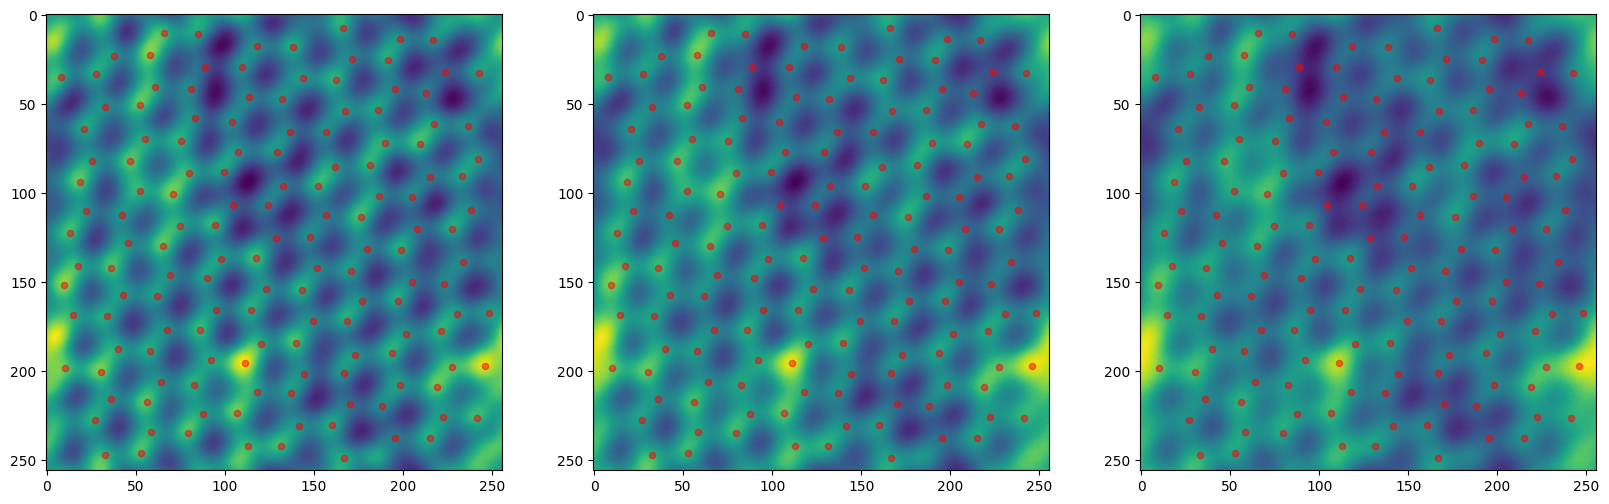

In [ ]:
n_images = 3
offset = 150
key_list = list(res['train']['input']['imgs'].keys())[0+offset:n_images+offset]

fig, axs = plt.subplots(1, n_images, figsize=(20,20))
for i in range(n_images):
    axs[i].imshow(imgs[key_list[i]])
    axs[i].scatter(coords[key_list[i]][:,0], coords[key_list[i]][:,1], s = 20, c = 'r', alpha=0.5)

# Prepare the input dictionary for model inference


The input of the models is a dictionary of input STEM image arrays, the model weights to be loaded, an image resize factor, and bool value of using cuda or not. You can also past a list of dictionaries to process multiple images at one call of the model.

e.g. dictin = {'image': im, 'modelweights': 'cubic', 'change_size': 0.5, 'cuda': False}

**modelweights**:

The available sets of model weights of Lin model are 'gaussianMask+' and 'superresolution' (the two with best performance for the atom finding task within 14 available model weights from original publisher - see the paper for details).

The available sets of model weights of Ziatdinov model are 'cubic' and 'hexagonal' targeting images of different crystal lattices.

**change_size**:

Set to 1 to keep the input image the same size.
Set to greater than 1 for upsampling and smaller than 1 to downsampling the input image.
Try downsampling if seen many false positives in the background, and try upsampling if seen lots of missed atom columns.

**cuda**:

Currently the foundry service only support running models on CPU so use cuda=False
The cell below will run one of the model on images within the benchmark dataset.



In [ ]:
import numpy as np
index = 25 # the index number of the image you want to load from the whole dataset (0-298)

key = list(imgs.keys())[index]
im = np.asarray(imgs[key])

# # For Ziatdinov's model
dictin = {
  'image': im,
  'modelweights':'cubic',
  'change_size': 0.5,  
  'cuda': False,
  }

# For Lin's model

dictin = {
  'image': im,
  'modelweights':'gaussianMask+',
  'change_size': 1,
  'cuda': False
  }




# Run model prediction


In [ ]:
ziatdinov_model = 'jwei74_wisc/Ziatdinov_AtomNet' # get more info from https://doi.org/10.26311/BF7A-7071
Lin_model = 'jwei74_wisc/Lin_AtomSegNet' # get more info from https://doi.org/10.26311/8S9H-DZ64

#predictpos_x, predictpos_y = f.run(ziatdinov_model, dictin)[0]
predictpos_x, predictpos_y = f.run(Lin_model, dictin)[0]

# Check the results

Next we visulize the results. Blue circles indicate ground truth positions, red dots represent the model predictions. The ground truth positions are part of the Foundry data set.

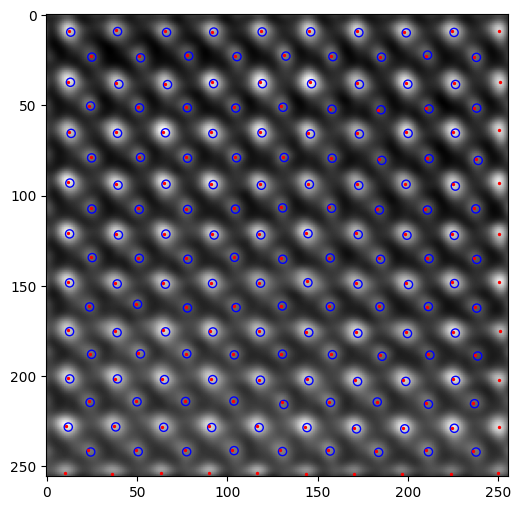

In [ ]:
#extract a single image from the set and resize it by the factor used in the analysis
from PIL import Image
img = Image.fromarray(im, 'L')
img = img.resize((int(im.shape[1]*dictin['change_size']),int(im.shape[0]*dictin['change_size'])), Image.BILINEAR)

#extract the ground truth positions for the same image from the Foundry dataset
truthpos_x,truthpos_y = np.transpose(coords[key])*dictin['change_size']
truthnum = truthpos_y.shape[0]

#display the image with the ground truth positions and the model determined positions as overlays
fig = plt.figure(figsize=(6,6))
plt.imshow(img, cmap = 'gray')
plt.scatter(truthpos_x,truthpos_y,s = 35, facecolors='none', edgecolors = 'b')
plt.scatter(predictpos_x,predictpos_y,s = 2, c = 'red')

plt.show()